# CHAPTER 11 - TIME SERIES

## DATA AND TIME DATA TYPES AND TOOLS

In [1]:
from datetime import datetime

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2021, 5, 11, 10, 18, 9, 64253)

In [4]:
now.year, now.month, now.day

(2021, 5, 11)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 15)

In [6]:
delta

datetime.timedelta(days=926, seconds=32400)

In [7]:
delta.days

926

In [8]:
delta.seconds

32400

In [9]:
from datetime import timedelta

In [10]:
start = datetime(2011, 1, 7)

In [11]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [13]:
stamp = datetime(2011, 1, 3)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [16]:
stamp.strftime('%F')

'2011-01-03'

In [17]:
stamp.strftime('%D')

'01/03/11'

In [18]:
value = '2011-01-03'

In [19]:
data = datetime.strptime(value, '%Y-%m-%d')
data

datetime.datetime(2011, 1, 3, 0, 0)

In [20]:
datestrs = ['7/6/2011', '8/6/2011']

In [21]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [22]:
from dateutil.parser import parse

In [23]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [24]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [25]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [26]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [27]:
import pandas as pd 

In [28]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [29]:
idx = pd.to_datetime(datestrs + [None])

In [30]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [31]:
idx[2]

NaT

In [32]:
pd.isnull(idx)

array([False, False,  True])

## TIME SERIES BASICS

In [33]:
from datetime import datetime
import numpy as np 

In [34]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), 
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [35]:
ts = pd.Series(np.random.randn(6), index=dates)

In [36]:
ts

2011-01-02    2.365085
2011-01-05   -2.913799
2011-01-07    0.161114
2011-01-08   -0.233892
2011-01-10   -0.898552
2011-01-12    0.095969
dtype: float64

In [37]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [38]:
ts + ts[::2]

2011-01-02    4.730171
2011-01-05         NaN
2011-01-07    0.322228
2011-01-08         NaN
2011-01-10   -1.797104
2011-01-12         NaN
dtype: float64

In [39]:
ts[::2]

2011-01-02    2.365085
2011-01-07    0.161114
2011-01-10   -0.898552
dtype: float64

In [40]:
ts.index.dtype

dtype('<M8[ns]')

In [41]:
stamp = ts.index[0]

In [42]:
stamp

Timestamp('2011-01-02 00:00:00')

## INDEXING, SELECTION, SUBSETTING

In [43]:
stamp = ts.index[2]

In [44]:
ts[stamp]

0.16111396414961868

In [45]:
ts['1/10/2011']

-0.8985519587077354

In [46]:
ts['20110110']

-0.8985519587077354

In [47]:
longer_ts = pd.Series(np.random.randn(1000),
            index=pd.date_range('1/1/2000', periods=1000))

In [48]:
longer_ts

2000-01-01   -0.150458
2000-01-02    0.036485
2000-01-03    2.098545
2000-01-04    0.642419
2000-01-05   -0.436457
                ...   
2002-09-22    0.584960
2002-09-23    0.207163
2002-09-24    1.638075
2002-09-25   -1.537029
2002-09-26    0.842000
Freq: D, Length: 1000, dtype: float64

In [49]:
longer_ts['2001']

2001-01-01    0.575195
2001-01-02   -2.736178
2001-01-03   -0.949340
2001-01-04   -0.653961
2001-01-05   -0.488989
                ...   
2001-12-27    0.411251
2001-12-28   -0.920499
2001-12-29    1.407613
2001-12-30    1.614528
2001-12-31   -1.180663
Freq: D, Length: 365, dtype: float64

In [50]:
longer_ts['2001-05']

2001-05-01    0.036512
2001-05-02   -0.978372
2001-05-03    0.432604
2001-05-04    2.202025
2001-05-05   -0.127440
2001-05-06   -1.440052
2001-05-07    0.621998
2001-05-08   -1.258290
2001-05-09    0.506633
2001-05-10    0.359317
2001-05-11   -0.171475
2001-05-12    0.751873
2001-05-13   -0.774495
2001-05-14   -1.805905
2001-05-15    1.194504
2001-05-16    1.044283
2001-05-17    1.976578
2001-05-18    1.503878
2001-05-19    0.175704
2001-05-20   -0.604787
2001-05-21    0.719146
2001-05-22    0.425855
2001-05-23    1.307043
2001-05-24   -1.003325
2001-05-25   -1.465278
2001-05-26    0.610514
2001-05-27   -0.297559
2001-05-28    0.545718
2001-05-29    0.683840
2001-05-30    0.070080
2001-05-31    0.922146
Freq: D, dtype: float64

In [51]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.161114
2011-01-08   -0.233892
2011-01-10   -0.898552
2011-01-12    0.095969
dtype: float64

In [52]:
ts

2011-01-02    2.365085
2011-01-05   -2.913799
2011-01-07    0.161114
2011-01-08   -0.233892
2011-01-10   -0.898552
2011-01-12    0.095969
dtype: float64

In [53]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.161114
2011-01-08   -0.233892
2011-01-10   -0.898552
dtype: float64

In [54]:
ts.truncate(after='1/9/2011')

2011-01-02    2.365085
2011-01-05   -2.913799
2011-01-07    0.161114
2011-01-08   -0.233892
dtype: float64

In [55]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [56]:
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [57]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                       'New York', 'Ohio'])

In [58]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,1.229324,-0.166439,-0.678815,-0.030850
2001-05-09,0.087867,-1.737127,1.578443,0.500972
2001-05-16,-2.691756,0.366137,-1.844227,0.028798
2001-05-23,-0.742690,0.366918,-0.637609,-0.432480
2001-05-30,0.398348,1.616888,1.691769,0.717473


## TIMES SERIES WITH DUPLICATE INDICES

In [59]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [60]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [61]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [62]:
dup_ts.index.is_unique

False

In [63]:
dup_ts['1/3/2000'] 

4

In [64]:
dup_ts['1/2/2000'] 

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [65]:
grouped = dup_ts.groupby(level=0)

In [66]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [67]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## DATA RANGES, FREQUENCIES, AND SHIFTING

In [68]:
ts

2011-01-02    2.365085
2011-01-05   -2.913799
2011-01-07    0.161114
2011-01-08   -0.233892
2011-01-10   -0.898552
2011-01-12    0.095969
dtype: float64

In [69]:
resampler = ts.resample('D')

In [70]:
resampler

## GENERATING DATE RANGES

In [71]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [72]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [73]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [74]:
pd.date_range(start='2012-04-01', periods=20, freq='BM')

DatetimeIndex(['2012-04-30', '2012-05-31', '2012-06-29', '2012-07-31',
               '2012-08-31', '2012-09-28', '2012-10-31', '2012-11-30',
               '2012-12-31', '2013-01-31', '2013-02-28', '2013-03-29',
               '2013-04-30', '2013-05-31', '2013-06-28', '2013-07-31',
               '2013-08-30', '2013-09-30', '2013-10-31', '2013-11-29'],
              dtype='datetime64[ns]', freq='BM')

In [75]:
pd.date_range(start='2012-04-01', periods=20, freq='D')

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [76]:
pd.date_range(start='2012-04-01', periods=20, freq='B')

DatetimeIndex(['2012-04-02', '2012-04-03', '2012-04-04', '2012-04-05',
               '2012-04-06', '2012-04-09', '2012-04-10', '2012-04-11',
               '2012-04-12', '2012-04-13', '2012-04-16', '2012-04-17',
               '2012-04-18', '2012-04-19', '2012-04-20', '2012-04-23',
               '2012-04-24', '2012-04-25', '2012-04-26', '2012-04-27'],
              dtype='datetime64[ns]', freq='B')

In [77]:
pd.date_range(start='2012-04-01', periods=20, freq='W')

DatetimeIndex(['2012-04-01', '2012-04-08', '2012-04-15', '2012-04-22',
               '2012-04-29', '2012-05-06', '2012-05-13', '2012-05-20',
               '2012-05-27', '2012-06-03', '2012-06-10', '2012-06-17',
               '2012-06-24', '2012-07-01', '2012-07-08', '2012-07-15',
               '2012-07-22', '2012-07-29', '2012-08-05', '2012-08-12'],
              dtype='datetime64[ns]', freq='W-SUN')

In [78]:
pd.date_range(start='2012-04-01', periods=20, freq='Q-JAN')

DatetimeIndex(['2012-04-30', '2012-07-31', '2012-10-31', '2013-01-31',
               '2013-04-30', '2013-07-31', '2013-10-31', '2014-01-31',
               '2014-04-30', '2014-07-31', '2014-10-31', '2015-01-31',
               '2015-04-30', '2015-07-31', '2015-10-31', '2016-01-31',
               '2016-04-30', '2016-07-31', '2016-10-31', '2017-01-31'],
              dtype='datetime64[ns]', freq='Q-JAN')

In [79]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [80]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## FREQUENCIES AND DATA OFFSETS

In [81]:
from pandas.tseries.offsets import Hour, Minute

In [82]:
hour = Hour()

In [83]:
hour

<Hour>

In [84]:
four_hours = Hour(4)

In [85]:
four_hours

<4 * Hours>

In [86]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [87]:
Hour(2) + Minute(30)

<150 * Minutes>

In [88]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [89]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [90]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [91]:
ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [92]:
ts

2000-01-31   -0.356860
2000-02-29    0.208826
2000-03-31    0.178738
2000-04-30    1.060435
Freq: M, dtype: float64

In [93]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.356860
2000-04-30    0.208826
Freq: M, dtype: float64

In [94]:
ts.shift(-2)

2000-01-31    0.178738
2000-02-29    1.060435
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [95]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -1.585178
2000-03-31   -0.144082
2000-04-30    4.932889
Freq: M, dtype: float64

In [96]:
ts

2000-01-31   -0.356860
2000-02-29    0.208826
2000-03-31    0.178738
2000-04-30    1.060435
Freq: M, dtype: float64

In [97]:
ts.shift(1) 

2000-01-31         NaN
2000-02-29   -0.356860
2000-03-31    0.208826
2000-04-30    0.178738
Freq: M, dtype: float64

In [98]:
ts.shift(2, freq='M')

2000-03-31   -0.356860
2000-04-30    0.208826
2000-05-31    0.178738
2000-06-30    1.060435
Freq: M, dtype: float64

In [99]:
ts.shift(3, freq='D')

2000-02-03   -0.356860
2000-03-03    0.208826
2000-04-03    0.178738
2000-05-03    1.060435
dtype: float64

In [100]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.356860
2000-02-29 01:30:00    0.208826
2000-03-31 01:30:00    0.178738
2000-04-30 01:30:00    1.060435
dtype: float64

## SHIFITING DATES WITH OFFSETS 

In [101]:
from pandas.tseries.offsets import Day, MonthEnd

In [102]:
now = datetime(2011, 11, 17)

In [103]:
now

datetime.datetime(2011, 11, 17, 0, 0)

In [104]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [105]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [106]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [107]:
offset = MonthEnd()

In [108]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [109]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [110]:
ts = pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [111]:
ts

2000-01-15    0.212081
2000-01-19   -0.170404
2000-01-23   -0.371552
2000-01-27   -0.424561
2000-01-31   -0.286949
2000-02-04   -1.309000
2000-02-08   -0.530616
2000-02-12    0.092168
2000-02-16    0.642311
2000-02-20    0.356551
2000-02-24    1.105267
2000-02-28   -1.621957
2000-03-03    1.275408
2000-03-07    0.164287
2000-03-11    0.540524
2000-03-15    0.564259
2000-03-19   -0.362366
2000-03-23   -1.179163
2000-03-27    0.398948
2000-03-31   -0.824382
Freq: 4D, dtype: float64

In [112]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.208277
2000-02-29   -0.180754
2000-03-31    0.072189
dtype: float64

In [113]:
ts.resample('M').mean()

2000-01-31   -0.208277
2000-02-29   -0.180754
2000-03-31    0.072189
Freq: M, dtype: float64

## TIME ZONE HANDLING

In [114]:
import pytz

In [115]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [116]:
tz = pytz.timezone('America/New_York')

In [117]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### TIME ZONE LOCALIZATION 

In [118]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [119]:
 ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [120]:
rng

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [121]:
ts

2012-03-09 09:30:00   -0.211272
2012-03-10 09:30:00    0.114218
2012-03-11 09:30:00    0.484644
2012-03-12 09:30:00    1.187376
2012-03-13 09:30:00    0.236192
2012-03-14 09:30:00   -0.261954
Freq: D, dtype: float64

In [122]:
print(ts.index.tz)

None


In [123]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [124]:
ts

2012-03-09 09:30:00   -0.211272
2012-03-10 09:30:00    0.114218
2012-03-11 09:30:00    0.484644
2012-03-12 09:30:00    1.187376
2012-03-13 09:30:00    0.236192
2012-03-14 09:30:00   -0.261954
Freq: D, dtype: float64

In [125]:
ts_utc = ts.tz_localize('UTC')

In [126]:
ts_utc

2012-03-09 09:30:00+00:00   -0.211272
2012-03-10 09:30:00+00:00    0.114218
2012-03-11 09:30:00+00:00    0.484644
2012-03-12 09:30:00+00:00    1.187376
2012-03-13 09:30:00+00:00    0.236192
2012-03-14 09:30:00+00:00   -0.261954
Freq: D, dtype: float64

In [127]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.211272
2012-03-10 04:30:00-05:00    0.114218
2012-03-11 05:30:00-04:00    0.484644
2012-03-12 05:30:00-04:00    1.187376
2012-03-13 05:30:00-04:00    0.236192
2012-03-14 05:30:00-04:00   -0.261954
Freq: D, dtype: float64

In [128]:
ts_eastern = ts.tz_localize('America/New_York')

In [129]:
ts_eastern

2012-03-09 09:30:00-05:00   -0.211272
2012-03-10 09:30:00-05:00    0.114218
2012-03-11 09:30:00-04:00    0.484644
2012-03-12 09:30:00-04:00    1.187376
2012-03-13 09:30:00-04:00    0.236192
2012-03-14 09:30:00-04:00   -0.261954
dtype: float64

In [130]:
ts_eastern = ts.tz_localize('America/New_York')

In [131]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.211272
2012-03-10 15:30:00+01:00    0.114218
2012-03-11 14:30:00+01:00    0.484644
2012-03-12 14:30:00+01:00    1.187376
2012-03-13 14:30:00+01:00    0.236192
2012-03-14 14:30:00+01:00   -0.261954
dtype: float64

In [132]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

## OPERATIONS WITH TIME ZONE - AWARE TIMESTAMP OBJECTS 

In [133]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [134]:
stamp_utc = stamp.tz_localize('utc')

In [135]:
stamp

Timestamp('2011-03-12 04:00:00')

In [136]:
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [137]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [138]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [139]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [140]:
stamp_utc.value

1299902400000000000

In [141]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [142]:
from pandas.tseries.offsets import Hour

In [143]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [144]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [145]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [146]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [147]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [148]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

## OPERATIONS BETWEEN DIFFERENT TIME ZONES 

In [149]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [150]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [151]:
ts1 = ts[:7].tz_localize('Europe/London')

In [152]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [153]:
result = ts1 + ts2

In [154]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [155]:
ts1

2012-03-07 09:30:00+00:00   -1.059258
2012-03-08 09:30:00+00:00   -0.587057
2012-03-09 09:30:00+00:00   -0.602566
2012-03-12 09:30:00+00:00    0.215488
2012-03-13 09:30:00+00:00   -1.009580
2012-03-14 09:30:00+00:00    0.066308
2012-03-15 09:30:00+00:00   -0.051760
dtype: float64

In [156]:
ts2

2012-03-09 13:30:00+04:00   -0.602566
2012-03-12 13:30:00+04:00    0.215488
2012-03-13 13:30:00+04:00   -1.009580
2012-03-14 13:30:00+04:00    0.066308
2012-03-15 13:30:00+04:00   -0.051760
dtype: float64

## PERIODS AND PERIOD ARITHMETIC

In [157]:
p = pd.Period(2007, freq='A-DEC')

In [158]:
p

Period('2007', 'A-DEC')

In [159]:
p + 5

Period('2012', 'A-DEC')

In [160]:
p - 2

Period('2005', 'A-DEC')

In [161]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [162]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [163]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [164]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.400617
2000-02    0.003853
2000-03    0.280559
2000-04    0.191348
2000-05   -2.781193
2000-06   -0.427800
Freq: M, dtype: float64

In [165]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [166]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [167]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

## PERIOD FREQUENCY CONVERSION

In [168]:
p = pd.Period('2007', freq='A-DEC')

In [169]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [170]:
p

Period('2007', 'A-DEC')

In [171]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [172]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [173]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [174]:
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]', freq='A-DEC')

In [175]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [176]:
ts

2006   -0.265563
2007   -0.722822
2008    0.102113
2009   -1.685085
Freq: A-DEC, dtype: float64

In [177]:
ts.asfreq('M', how='start')

2006-01   -0.265563
2007-01   -0.722822
2008-01    0.102113
2009-01   -1.685085
Freq: M, dtype: float64

## QUARTERLY PERIOD FREQUENCIES

In [178]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [179]:
p

Period('2012Q4', 'Q-JAN')

In [180]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [181]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [182]:
p.asfreq('B', 'e') 

Period('2012-01-31', 'B')

In [183]:
(p.asfreq('B', 'e') - 1)

Period('2012-01-30', 'B')

In [184]:
(p.asfreq('B', 'e') - 1).asfreq('T', 's')

Period('2012-01-30 00:00', 'T')

In [185]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [186]:
p4pm

Period('2012-01-30 16:00', 'T')

In [187]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [188]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [189]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [190]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [191]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [192]:
ts.index = new_rng.to_timestamp()

In [193]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

## COVERTING TIMESTAMS TO PERIODS (AND BACK)

In [194]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [195]:
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [196]:
ts = pd.Series(np.random.rand(3), index=rng)

In [197]:
ts

2000-01-31    0.715386
2000-02-29    0.300618
2000-03-31    0.472957
Freq: M, dtype: float64

In [198]:
pts = ts.to_period()

In [199]:
pts

2000-01    0.715386
2000-02    0.300618
2000-03    0.472957
Freq: M, dtype: float64

In [200]:
 rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [201]:
rng

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [202]:
ts2 = pd.Series(np.random.rand(6), index=rng)

In [203]:
ts2

2000-01-29    0.914627
2000-01-30    0.684752
2000-01-31    0.067323
2000-02-01    0.609440
2000-02-02    0.451078
2000-02-03    0.449905
Freq: D, dtype: float64

In [204]:
ts2.to_period('M')

2000-01    0.914627
2000-01    0.684752
2000-01    0.067323
2000-02    0.609440
2000-02    0.451078
2000-02    0.449905
Freq: M, dtype: float64

In [205]:
pts = ts2.to_period()

In [206]:
pts

2000-01-29    0.914627
2000-01-30    0.684752
2000-01-31    0.067323
2000-02-01    0.609440
2000-02-02    0.451078
2000-02-03    0.449905
Freq: D, dtype: float64

In [207]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.914627
2000-01-30 23:59:59.999999999    0.684752
2000-01-31 23:59:59.999999999    0.067323
2000-02-01 23:59:59.999999999    0.609440
2000-02-02 23:59:59.999999999    0.451078
2000-02-03 23:59:59.999999999    0.449905
Freq: D, dtype: float64

##  CREATING A PERIOD INDEX FROM ARRAYS

In [208]:
data = pd.read_csv('examples/macrodata.csv')

In [209]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [210]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [211]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [212]:
index = pd.PeriodIndex(year=data.year,
                       quarter=data.quarter,
                       freq='Q-DEC'
)

In [213]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [214]:
data.index = index

In [215]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [216]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## RESAMPLING AND FREQUENCY CONVERSION

In [217]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [218]:
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [219]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [220]:
ts

2000-01-01    0.778571
2000-01-02   -1.387772
2000-01-03   -0.443802
2000-01-04    0.603063
2000-01-05   -1.513101
                ...   
2000-04-05    0.964172
2000-04-06   -0.937178
2000-04-07    0.423813
2000-04-08   -0.697209
2000-04-09    0.837762
Freq: D, Length: 100, dtype: float64

In [221]:
ts.resample('M').mean()

2000-01-31   -0.206093
2000-02-29   -0.149288
2000-03-31    0.080607
2000-04-30    0.198426
Freq: M, dtype: float64

In [222]:
ts

2000-01-01    0.778571
2000-01-02   -1.387772
2000-01-03   -0.443802
2000-01-04    0.603063
2000-01-05   -1.513101
                ...   
2000-04-05    0.964172
2000-04-06   -0.937178
2000-04-07    0.423813
2000-04-08   -0.697209
2000-04-09    0.837762
Freq: D, Length: 100, dtype: float64

In [223]:
ts.resample('M', kind='period').mean()

2000-01   -0.206093
2000-02   -0.149288
2000-03    0.080607
2000-04    0.198426
Freq: M, dtype: float64

## DOWNSAMPLING

In [224]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [225]:
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [226]:
ts = pd.Series(np.arange(12), index=rng)

In [227]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [228]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [229]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [230]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

<ipython-input-230-793d385fe06a>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right', label='right', loffset='-1s').sum()


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [231]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


## UPSAMPLING AND INTERPOLATION

In [233]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index =pd.date_range('1/1/2000',
                                          periods=2,
                                          freq='W-WED'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [234]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.437657,0.424963,-0.549250,-0.037466
2000-01-12,-0.110231,-0.361400,-0.040273,0.463222


In [235]:
df_daily = frame.resample('D').asfreq()

In [236]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.437657,0.424963,-0.549250,-0.037466
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.110231,-0.361400,-0.040273,0.463222


In [237]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.437657,0.424963,-0.549250,-0.037466
2000-01-06,-0.437657,0.424963,-0.549250,-0.037466
2000-01-07,-0.437657,0.424963,-0.549250,-0.037466
2000-01-08,-0.437657,0.424963,-0.549250,-0.037466
2000-01-09,-0.437657,0.424963,-0.549250,-0.037466
2000-01-10,-0.437657,0.424963,-0.549250,-0.037466
2000-01-11,-0.437657,0.424963,-0.549250,-0.037466
2000-01-12,-0.110231,-0.361400,-0.040273,0.463222


In [238]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.437657,0.424963,-0.549250,-0.037466
2000-01-06,-0.437657,0.424963,-0.549250,-0.037466
2000-01-07,-0.437657,0.424963,-0.549250,-0.037466
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.110231,-0.361400,-0.040273,0.463222


In [240]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.437657,0.424963,-0.549250,-0.037466
2000-01-13,-0.110231,-0.361400,-0.040273,0.463222


## RESAMPLING WITH PERIODS

In [241]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                            freq='M'),
                      columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [242]:
frame

,Colorado,Texas,New York,Ohio
2000-01,0.385896,-0.036020,2.272944,-0.135390
2000-02,-0.136769,0.247474,-0.689090,-0.669852
2000-03,0.123872,-0.629506,1.022191,0.116971
2000-04,2.490853,0.769335,-0.602553,1.076495
2000-05,-0.776960,-0.257171,2.067551,-0.050201
2000-06,-0.208644,1.301609,-0.944103,1.010191
2000-07,1.985533,-0.498589,0.214587,-1.057481
2000-08,1.367204,-0.388110,-1.089476,0.348099
2000-09,-0.699235,1.085628,-1.175172,0.422778
2000-10,-2.177902,-0.437479,1.067414,0.115067


In [243]:
annual_frame = frame.resample('A-DEC').mean()

In [244]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.026604,0.118398,0.187569,0.037527
2001,0.100155,-0.076122,0.120981,0.030086


In [245]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.026604,0.118398,0.187569,0.037527
2000Q2,-0.026604,0.118398,0.187569,0.037527
2000Q3,-0.026604,0.118398,0.187569,0.037527
2000Q4,-0.026604,0.118398,0.187569,0.037527
2001Q1,0.100155,-0.076122,0.120981,0.030086
2001Q2,0.100155,-0.076122,0.120981,0.030086
2001Q3,0.100155,-0.076122,0.120981,0.030086
2001Q4,0.100155,-0.076122,0.120981,0.030086


In [246]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.026604,0.118398,0.187569,0.037527
2001Q1,-0.026604,0.118398,0.187569,0.037527
2001Q2,-0.026604,0.118398,0.187569,0.037527
2001Q3,-0.026604,0.118398,0.187569,0.037527
2001Q4,0.100155,-0.076122,0.120981,0.030086


In [247]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.026604,0.118398,0.187569,0.037527
2001Q1,-0.026604,0.118398,0.187569,0.037527
2001Q2,-0.026604,0.118398,0.187569,0.037527
2001Q3,-0.026604,0.118398,0.187569,0.037527
2001Q4,0.100155,-0.076122,0.120981,0.030086
2002Q1,0.100155,-0.076122,0.120981,0.030086
2002Q2,0.100155,-0.076122,0.120981,0.030086
2002Q3,0.100155,-0.076122,0.120981,0.030086


## MOVING WINDOWS FUNVTIONS

In [249]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)

In [250]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [251]:
close_px = close_px.resample('B').ffill()

<AxesSubplot:>

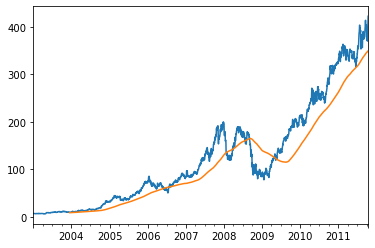

In [255]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [256]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [257]:
appl_std250

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    25.430104
2011-10-11    25.523131
2011-10-12    25.624851
2011-10-13    25.758644
2011-10-14    25.993449
Freq: B, Name: AAPL, Length: 2292, dtype: float64

<AxesSubplot:>

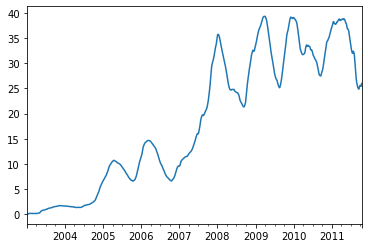

In [258]:
appl_std250.plot()

In [259]:
expanding_mean = appl_std250.expanding().mean()

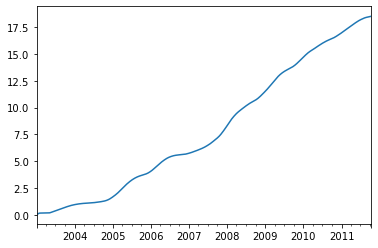

In [262]:
expanding_mean = appl_std250.expanding().mean().plot()

<AxesSubplot:>

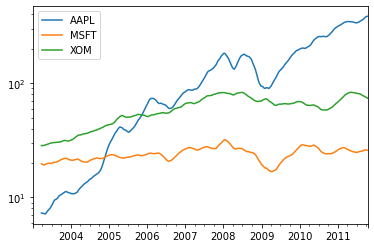

In [266]:
close_px.rolling(60).mean().plot(logy=True)

<AxesSubplot:>

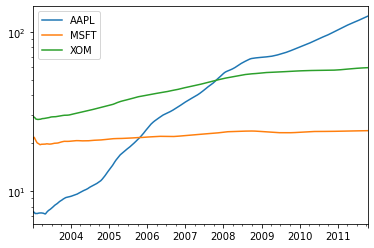

In [267]:
close_px.expanding().mean().plot(logy=True)

In [268]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


## EXPONENTIALLY WEIGHTED FUNCTIONS

In [269]:
aapl_px = close_px.AAPL['2006':'2007']

In [270]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [271]:
ewma60 = aapl_px.ewm(span=30).mean()

<AxesSubplot:>

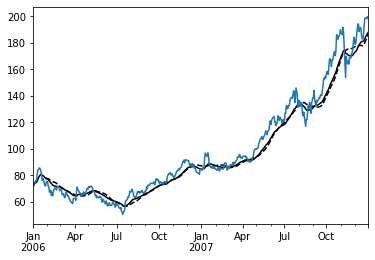

In [275]:
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
aapl_px.plot()


## BINARY MOVING WINDOW FUNCTIONS

In [277]:
spx_px = close_px_all['SPX']

In [278]:
spx_rets = spx_px.pct_change()

In [279]:
returns = close_px.pct_change()

In [280]:
spx_rets 

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
                ...   
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, Length: 2214, dtype: float64

In [281]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

<AxesSubplot:>

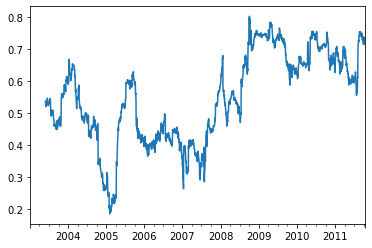

In [283]:
corr.plot()

In [284]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

<AxesSubplot:>

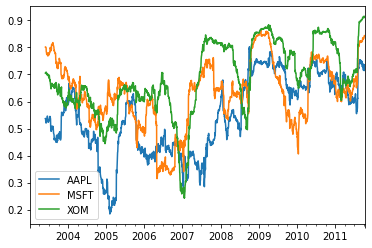

In [285]:
corr.plot()

In [286]:
from scipy.stats import percentileofscore

In [287]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [288]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

<AxesSubplot:>

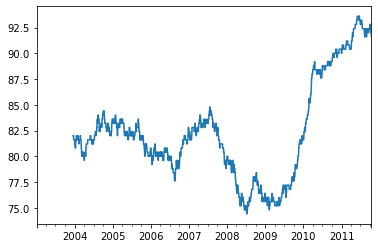

In [289]:
result.plot()